In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta, date
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cars ML Project/cars_dataset.csv')

In [ ]:
df.head(5)

,Car_name,Price,Car_type,Car_transmission,Reg_date,Manufacture_date,Engine_cap_cc,Car_weight_kg,Brake_hp,COE_term_len,No_owners,Car_url,Description,Reg_year,COE_term_days,dollar_p_day
0,Volkswagen Golf GT Sport 1.4A TSI (COE till 10...,3600,Hatchback,Auto,24-Mar-2009,2008,1390.0,1293.0,167,1mth 28days,3.0,https://www.sgcarmart.com/used_cars/info.php?I...,"Nice attractive short term drive fun, buy back...",2009,58,62.068966
1,Honda Accord Euro S 2.4A (COE till 03/2024),9800,Luxury,Auto,23-Apr-2009,2008,2354.0,1510.0,202,6mths 28days,3.0,https://www.sgcarmart.com/used_cars/info.php?I...,Well maintained and conditioned 2.4 Euro-S Acc...,2009,208,47.115385
2,Honda Stream 1.8A X (COE till 12/2023),4388,MPV,Auto,05-Dec-2008,2008,1799.0,1370.0,138,3mths 1day,NaN,https://www.sgcarmart.com/used_cars/info.php?I...,Road tax paid till the end.,2008,91,48.219780
3,Hyundai Avante 1.6A (COE till 02/2024),6700,Sedan,Auto,12-Mar-2009,2009,1591.0,1264.0,120,5mths 26days,3.0,https://www.sgcarmart.com/used_cars/info.php?I...,In times of market uncertainties and high rent...,2009,176,38.068182
4,Honda Stream 1.8A RSZ Sunroof (COE till 12/2023),4388,MPV,Auto,13-Dec-2008,2008,1799.0,1385.0,138,3mths 9days,5.0,https://www.sgcarmart.com/used_cars/info.php?I...,"Agent RSZ model, come with paddle shifter and ...",2008,99,44.323232


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_name          3448 non-null   object 
 1   Price             3448 non-null   int64  
 2   Car_type          3448 non-null   object 
 3   Car_transmission  3448 non-null   object 
 4   Reg_date          3448 non-null   object 
 5   Manufacture_date  3448 non-null   int64  
 6   Engine_cap_cc     3446 non-null   float64
 7   Car_weight_kg     3388 non-null   float64
 8   Brake_hp          3448 non-null   int64  
 9   COE_term_len      3433 non-null   object 
 10  No_owners         3342 non-null   float64
 11  Car_url           3448 non-null   object 
 12  Description       3335 non-null   object 
 13  Reg_year          3448 non-null   object 
 14  COE_term_days     3448 non-null   int64  
 15  dollar_p_day      3448 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory 

There are null values present in the dataset. The dataset contains columns with different datatypes, with some numerical and some string data.

In [ ]:
# find duplicate rows
df[df.duplicated()]

,Car_name,Price,Car_type,Car_transmission,Reg_date,Manufacture_date,Engine_cap_cc,Car_weight_kg,Brake_hp,COE_term_len,No_owners,Car_url,Description,Reg_year,COE_term_days,dollar_p_day
390,Mitsubishi Lancer 1.6M (COE till 12/2024),16800,Sedan,Manual,17-Dec-2009,2009,1584.0,1162.0,105,1yr 3mths 13days,4.0,https://www.sgcarmart.com/used_cars/info.php?I...,High loan available with lowest interest rates...,2009,468,35.897436
2451,Toyota Corolla Altis 1.6A Elegance,47966,Sedan,Auto,24-Nov-2015,2015,1598.0,1205.0,120,2yrs 2mths 20days,1.0,https://www.sgcarmart.com/used_cars/info.php?I...,1 Owner Unit.Assert Your Presence With Our Toy...,2015,810,59.217284


In [ ]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
#Check that no more duplicated rows
df[df.duplicated()]

,Car_name,Price,Car_type,Car_transmission,Reg_date,Manufacture_date,Engine_cap_cc,Car_weight_kg,Brake_hp,COE_term_len,No_owners,Car_url,Description,Reg_year,COE_term_days,dollar_p_day


<Axes: >

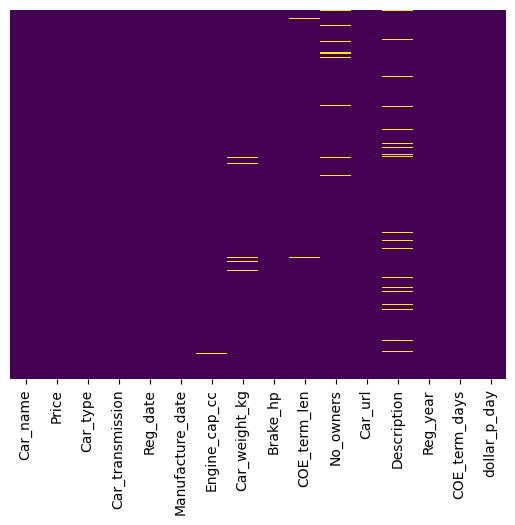

In [ ]:
#Visualising non null values (lines in yellow)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The above plot shows that majority of null values are from the *Description*, *number of owners* and *weight of car* columns.

We decided to remove dollar_p_day column, since it is derived from our target variable (price), and will not be available in making predictions when we get new data.

In [ ]:
### Roydon, Jia Hao, Rikhil

cols=['Reg_year','COE_term_days','Manufacture_date',
      'Car_weight_kg','Engine_cap_cc','Car_type','Brake_hp','Price']

# because dollar_p_day is derived from price; will be an uneccessary col for predicting price

df=df.drop('dollar_p_day',axis=1)

#now a local df (lf) for analysis of data

lf=df[cols].copy(deep=True) # deep copy made in event
# that other modifications are chosen

lf.head()

,Reg_year,COE_term_days,Manufacture_date,Car_weight_kg,Engine_cap_cc,Car_type,Brake_hp,Price
0,2009,58,2008,1293.0,1390.0,Hatchback,167,3600
1,2009,208,2008,1510.0,2354.0,Luxury,202,9800
2,2008,91,2008,1370.0,1799.0,MPV,138,4388
3,2009,176,2009,1264.0,1591.0,Sedan,120,6700
4,2008,99,2008,1385.0,1799.0,MPV,138,4388


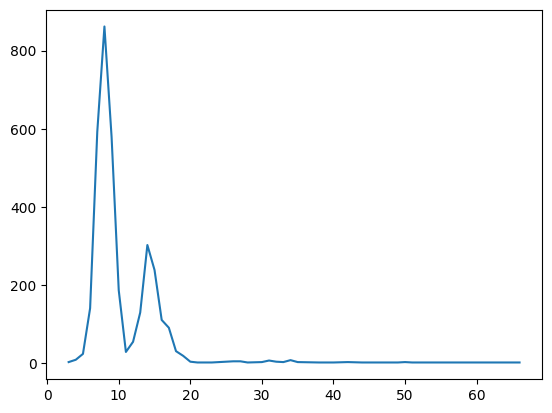

In [ ]:
lf['car_age']=lf['Manufacture_date'].apply(lambda x:dt.datetime.now().year-x)
vis=lf['car_age'].value_counts().sort_index() # q the range of cars
plt.plot(vis) # so bimodal - def non normal; most cars being 3-11 years old
# q a number are significantly older; peaking ard 14 yr mark (likely old COE)
# some models more than 20 years old > though sparse ~ 1 per year

In [ ]:
lf[['Engine_cap_cc','Car_weight_kg']].dropna().corr() # p high correlation btw
# both variables; to enforce w a scatterplot

,Engine_cap_cc,Car_weight_kg
Engine_cap_cc,1.00000,0.84076
Car_weight_kg,0.84076,1.00000


<Axes: xlabel='Engine_cap_cc', ylabel='Car_weight_kg'>

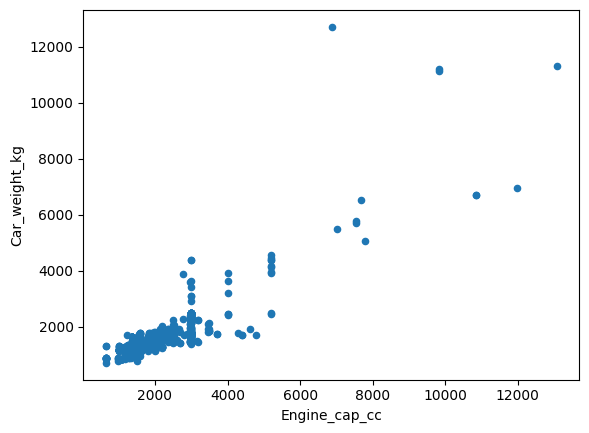

In [ ]:
lf[['Engine_cap_cc','Car_weight_kg']].dropna().plot(kind='scatter',
x='Engine_cap_cc',y='Car_weight_kg') # low variability at low engine cap
# values; beyond engine cap of 3000 cc, linearity does decrease -
# more piecewise linearity > def is strong positive linear corr @ low
# engine cap values > perhaps car type has an effect

In [ ]:
# get rows with nan values
lf[lf.isna().any(axis=1)]

,Reg_year,COE_term_days,Manufacture_date,Car_weight_kg,Engine_cap_cc,Car_type,Brake_hp,Price,car_age
6,1990,208,1989,NaN,1996.0,Luxury,107,6000,34
43,1993,176,1993,NaN,1998.0,Luxury,130,7800,30
101,1992,237,1992,NaN,1996.0,Luxury,120,7900,31
103,1990,208,1989,NaN,1996.0,Luxury,120,7800,34
280,1992,208,1992,NaN,1590.0,Sedan,124,11500,31
...,...,...,...,...,...,...,...,...,...
3257,N.A.,0,2016,NaN,988.0,Others,97,58800,7
3305,1989,2033,1989,NaN,2962.0,Luxury,118,53800,34
3329,1992,2033,1992,NaN,999.0,Hatchback,113,55000,31
3375,2010,2582,2016,NaN,1086.0,Hatchback,63,67800,7


In [ ]:
# from the rows with nans, find out what are the unique car types
lf[lf.isna().any(axis=1)]['Car_type'].unique()

array(['Luxury', 'Sedan', 'Hatchback', 'Others', 'Sports', 'SUV', 'Van'],
      dtype=object)

In [ ]:
# Does this interpolation work? it does the interpolation linearly by default
def interpolate_values(df, car):
  df.loc[df['Car_type'] == car] = df.interpolate()

int_list = ['Luxury', 'Sedan', 'Hatchback', 'Others', 'Sports', 'SUV', 'Van']

for car_type in int_list:
  interpolate_values(lf, car_type)

In [ ]:
lf[lf.isna().any(axis=1)]

,Reg_year,COE_term_days,Manufacture_date,Car_weight_kg,Engine_cap_cc,Car_type,Brake_hp,Price,car_age


Min engine_cc 647.0
Max engine_cc 13074.0


<Axes: ylabel='Frequency'>

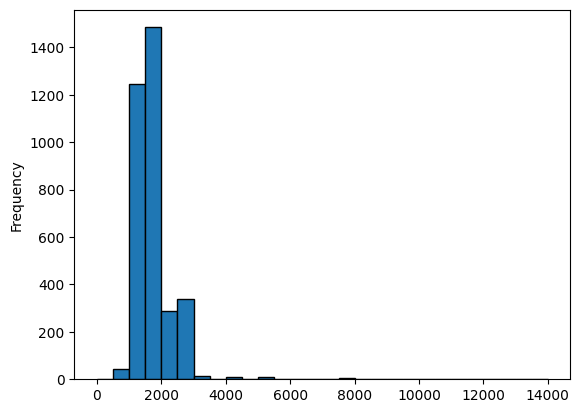

In [ ]:
# for interpolation > focus on the car type and engine cap
print('Min engine_cc',lf['Engine_cap_cc'].min())
print('Max engine_cc',lf['Engine_cap_cc'].max())
end_range=14000

lower=500
upper=4000
step=500
lf['Engine_cap_cc'].plot(kind='hist',bins=end_range//step,range=(0,end_range),
edgecolor='black')

# based on the distribution from the plot; it is prudent to have engine capacity
# separated in bins of 500-1000; 1000-1500; 1500-2000; 2000-2500; 2500-3000;
# 3000-3500; 3500-4000; > 4000

In [ ]:
def engine_range(x):
  lis=[i for i in range(lower,upper+1,step)]
  for i,e in enumerate(lis):
    if x<e:
      return f'{lis[i-1]}-{e}'
  return f'{upper}+'
lf['Engine_cc_range']=lf['Engine_cap_cc'].apply(engine_range)

In [ ]:
col_arr=[f'{i}-{i+step}' for i in range(lower,upper,step)]+[f'{upper}+']

pf=lf.dropna().pivot_table(index='Car_type',columns='Engine_cc_range',values='Car_weight_kg').reindex(col_arr, axis=1)
pf

Engine_cc_range,500-1000,1000-1500,1500-2000,2000-2500,2500-3000,3000-3500,3500-4000,4000+
Car_type,,,,,,,,
Bus,NaN,NaN,NaN,2026.666667,2066.666667,NaN,NaN,NaN
Hatchback,1116.265625,1163.330532,1337.413043,1315.000000,NaN,NaN,NaN,NaN
Luxury,1280.000000,1372.615385,1494.854651,1560.012987,1608.854167,1794.00,1765.0,1820.000000
MPV,NaN,1401.890625,1457.480000,1798.852941,NaN,1980.00,NaN,NaN
Others,1343.833333,1260.166667,NaN,1790.000000,NaN,NaN,NaN,NaN
SUV,NaN,1248.059361,1533.236686,1617.428571,1928.500000,2128.75,NaN,NaN
Sedan,1334.000000,1217.205426,1248.976344,1652.500000,NaN,NaN,NaN,NaN
Sports,NaN,1286.781250,1312.715686,1351.000000,1558.133333,1460.00,NaN,1721.666667
Stationwagon,NaN,1168.674419,1420.714286,1510.000000,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
### possible alternative; tho does have kinks
print('Car Type'.ljust(15)+'|Score | Points')
for veh in pf.index:
  n=list(pf.loc[veh].index==pf.loc[veh].dropna().index[0]).index(True)
  values=list(pf.loc[veh].dropna().values)
  index=list(range(n,len(pf.loc[veh].dropna())+n))

  model=LinearRegression().fit(np.array(index).reshape(-1,1),values)
  print(f'{veh:<15}|{round(model.score(np.array(index).reshape(-1,1),values),2)*100:<5} |',\
        list(map(lambda x:round((x*model.coef_+model.intercept_)[0],3),\
         [i for i in range(len(pf.loc[veh].index))])))
# where car type if  car type; score refers to explained variance of regression
# i.e. closer to 100 > more accurate it is (not a perfect metric but is promising)
# useful for most car types cept Others, Sedan and Truck types
# benefit of being able to predict unseen values (for car types with high scores)
###

Car Type       |Score | Points
Bus            |100.0 | [1906.667, 1946.667, 1986.667, 2026.667, 2066.667, 2106.667, 2146.667, 2186.667]
Hatchback      |82.0  | [1117.459, 1194.488, 1271.517, 1348.545, 1425.574, 1502.602, 1579.631, 1656.659]
Luxury         |96.0  | [1308.242, 1387.864, 1467.485, 1547.106, 1626.728, 1706.349, 1785.971, 1865.592]
MPV            |94.0  | [1140.631, 1348.201, 1555.771, 1763.341, 1970.911, 2178.481, 2386.051, 2593.621]
Others         |61.0  | [1241.583, 1464.667, 1687.75, 1910.833, 2133.917, 2357.0, 2580.083, 2803.167]
SUV            |98.0  | [1044.202, 1259.866, 1475.53, 1691.195, 1906.859, 2122.524, 2338.188, 2553.853]
Sedan          |41.0  | [1215.08, 1313.807, 1412.534, 1511.261, 1609.988, 1708.715, 1807.442, 1906.169]
Sports         |81.0  | [1166.041, 1246.71, 1327.379, 1408.048, 1488.717, 1569.386, 1650.055, 1730.724]
Stationwagon   |93.0  | [1025.137, 1195.8, 1366.463, 1537.126, 1707.788, 1878.451, 2049.114, 2219.777]
Truck          |45.0  | [-285.97

In [ ]:
def give_average(row):
  return pf[row['Engine_cc_range']].loc[row['Car_type']]

empty_weights=lf[lf['Car_weight_kg'].isna()]

for i,r in empty_weights.iterrows():
  lf.loc[i,'Car_weight_kg']=give_average(r) # data mostly interpolated
# tho some can't have a 'backed up' value > can drop those/
# refer to some other metric


In [ ]:
print('OG  number of NA weights :',len(df[df['Car_weight_kg'].isna()]))

print('New number of NA weights :',len(lf[lf['Car_weight_kg'].isna()]))

OG  number of NA weights : 60
New number of NA weights : 0


# **Scatter plots**

# **Car_weight_kg against Engine_cap_cc**

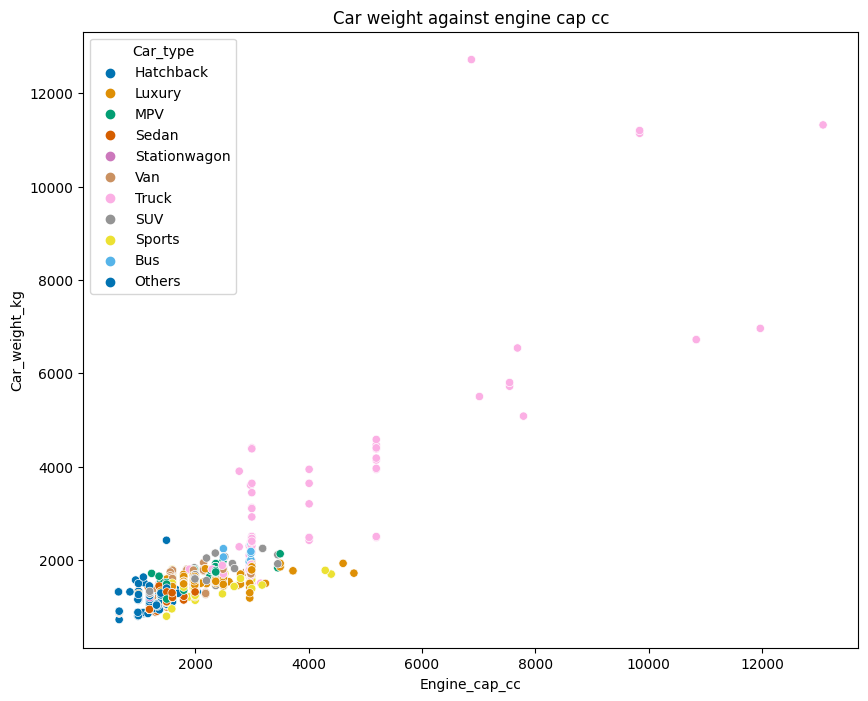

In [ ]:
# scatter plots to understand r/s between numeric columns
# Looks like there is a strong positive linear correlation between Engine_cap_cc and Car_weight_kg

fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of Car_weight_kg against Engine_cap_cc
# colour of points = car type
scatter_plot = sns.scatterplot(
    data=lf,
    x='Engine_cap_cc',
    y='Car_weight_kg',
    hue='Car_type',
    palette='colorblind',
)

# set title for plot
scatter_plot.set(title='Car weight against engine cap cc')

plt.show()
# Truck seems to deviate from the rest

In [ ]:
# Remove Trucks and find r again

lf_no_truck = lf.loc[lf['Car_type'] != 'Truck']
lf_no_truck[['Car_weight_kg', 'Engine_cap_cc']].corr()

,Car_weight_kg,Engine_cap_cc
Car_weight_kg,1.000000,0.740233
Engine_cap_cc,0.740233,1.000000


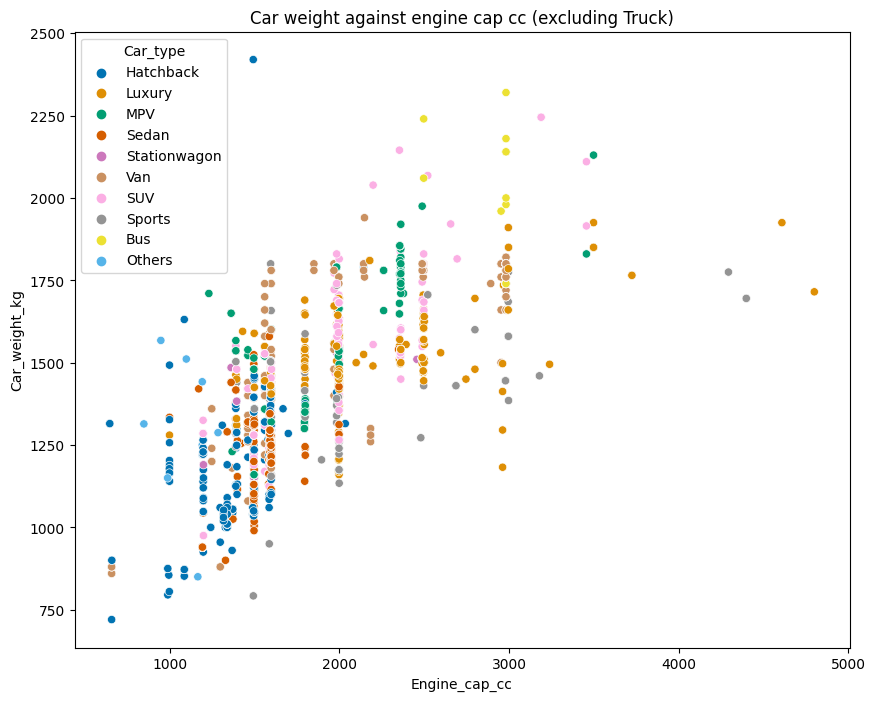

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of Car_weight_kg against Engine_cap_cc
# colour of points = car type
scatter_plot = sns.scatterplot(
    data=lf_no_truck,
    x='Engine_cap_cc',
    y='Car_weight_kg',
    hue='Car_type',
    palette='colorblind',
)

# set title for plot
scatter_plot.set(title='Car weight against engine cap cc (excluding Truck)')

plt.show()
# Car weight and engine cap doesn't seem to be related on closer inspection

# **Price against COE_term_days**

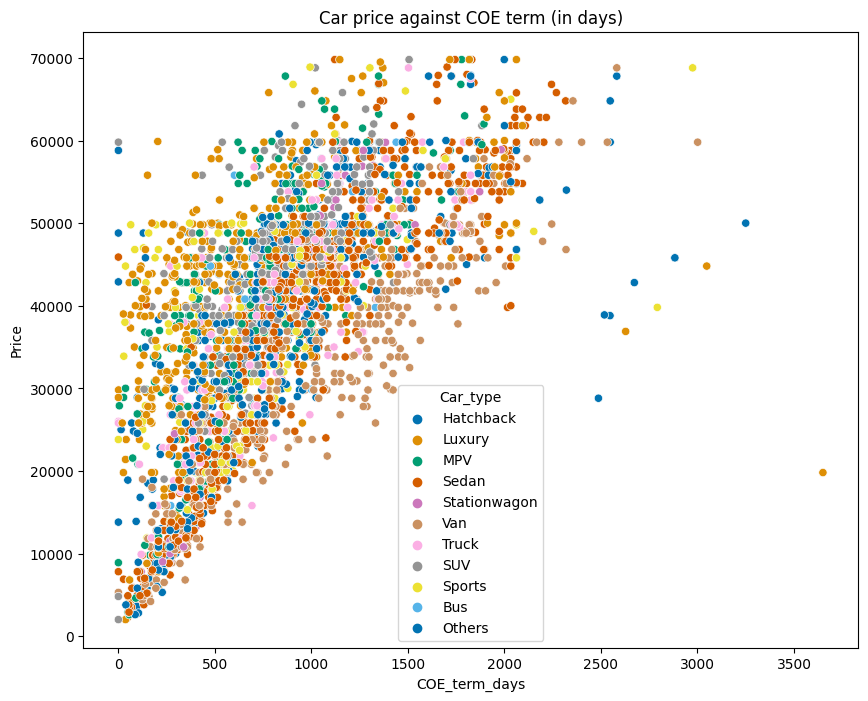

In [ ]:
# Looks like there is a moderate positive linear correlation between Price and COE_term_days

fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of Price against COE_term_days
# colour of points = car type
scatter_plot = sns.scatterplot(
    data=lf,
    x='COE_term_days',
    y='Price',
    hue='Car_type',
    palette='colorblind',
)

# set title for plot
scatter_plot.set(title='Car price against COE term (in days)')

plt.show()

# **Car weight against Brake_hp**

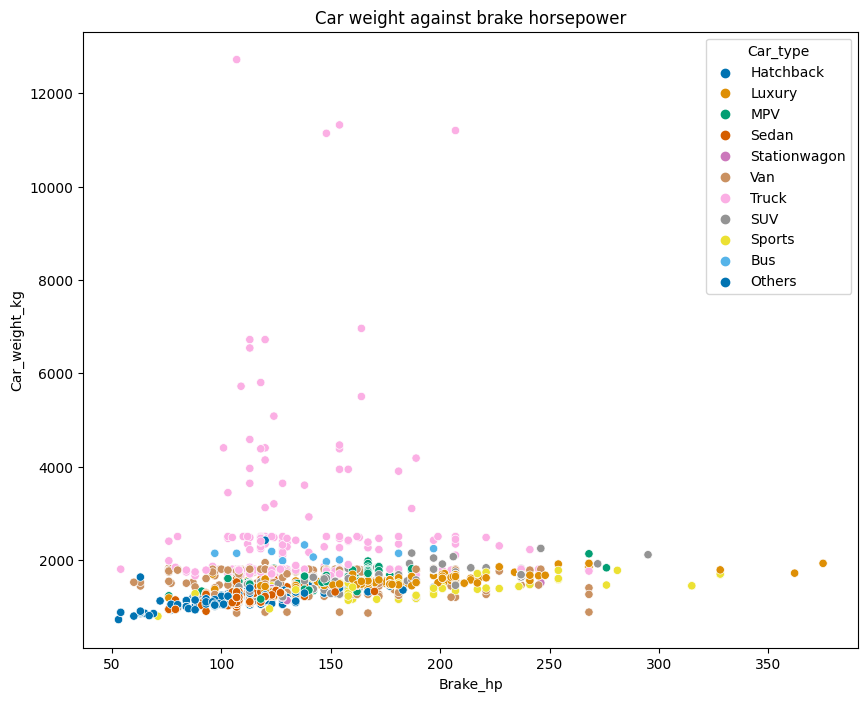

In [ ]:
# Scatter plot of Car_weight_kg against Brake_hp (in case there is a non-linear relationship)

fig, ax = plt.subplots(figsize=(10, 8))

# colour of points = car type
scatter_plot = sns.scatterplot(
    data=lf,
    x='Brake_hp',
    y='Car_weight_kg',
    hue='Car_type',
    palette='colorblind',
)

# set title for plot
scatter_plot.set(title='Car weight against brake horsepower')

plt.show()
# Looks like Truck is the one that deviates from the rest

In [ ]:
# See if removal of Truck will improve correlation coefficient significantly or no

lf_no_truck = lf.loc[lf['Car_type'] != 'Truck']
lf_no_truck[['Car_weight_kg', 'Brake_hp']].corr()
# Moderate positive linear correlation at best

,Car_weight_kg,Brake_hp
Car_weight_kg,1.000000,0.576274
Brake_hp,0.576274,1.000000


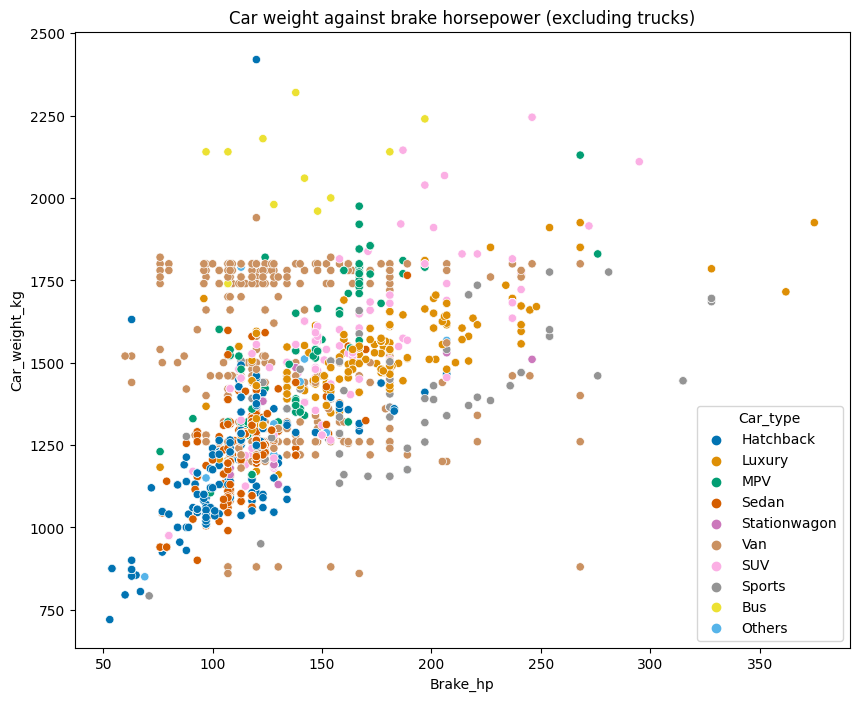

In [ ]:
# plot scatter graph again, but with no Truck

fig, ax = plt.subplots(figsize=(10, 8))

# colour of points = car type
scatter_plot = sns.scatterplot(
    data=lf_no_truck,
    x='Brake_hp',
    y='Car_weight_kg',
    hue='Car_type',
    palette='colorblind',
)

# set title for plot
scatter_plot.set(title='Car weight against brake horsepower (excluding trucks)')

plt.show()

# **Car_weight_kg against Car_age**

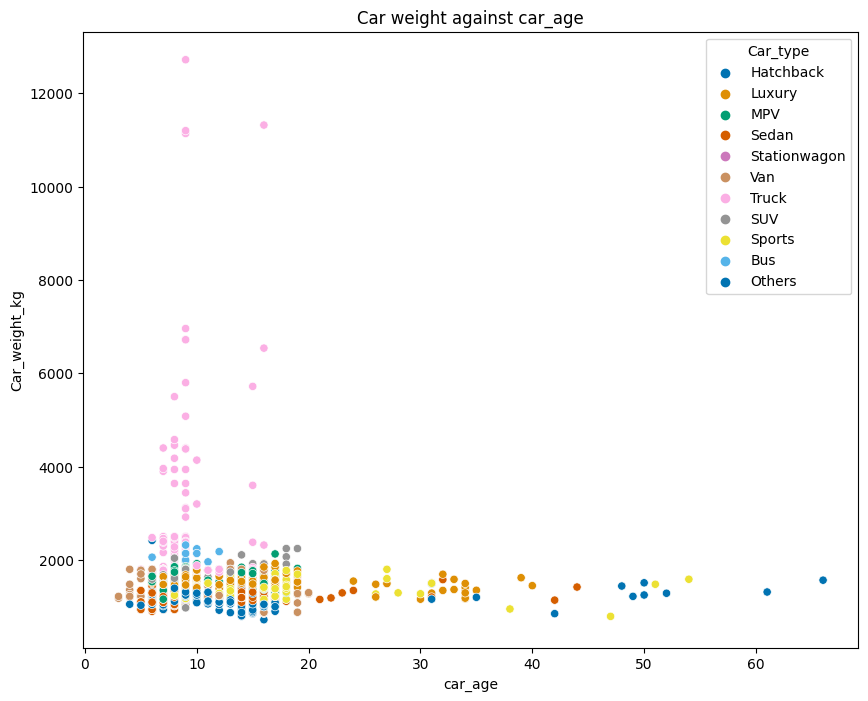

In [ ]:
# Scatter plot of Car_weight_kg against Car_age (in case there is a non-linear relationship)

fig, ax = plt.subplots(figsize=(10, 8))

# colour of points = car type
scatter_plot = sns.scatterplot(
    data=lf,
    x='car_age',
    y='Car_weight_kg',
    hue='Car_type',
    palette='colorblind',
)

# set title for plot
scatter_plot.set(title='Car weight against car_age')

plt.show()
# Don't think there's a relationship

# **Car_weight_kg against Price**

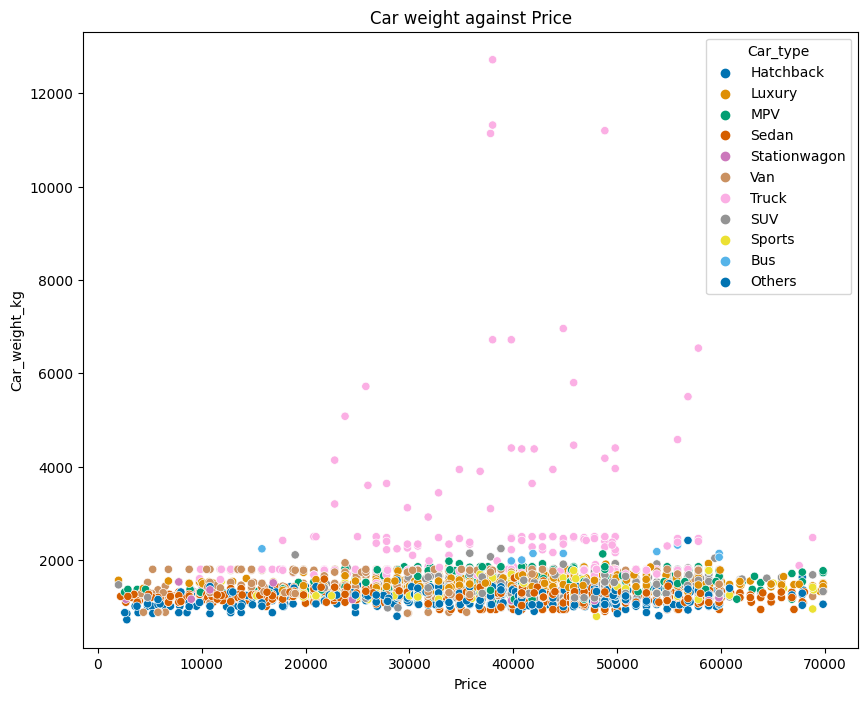

In [ ]:
# Scatter plot of Car_weight_kg against Price (in case there is a non-linear relationship)

fig, ax = plt.subplots(figsize=(10, 8))

# colour of points = car type
scatter_plot = sns.scatterplot(
    data=lf,
    x='Price',
    y='Car_weight_kg',
    hue='Car_type',
    palette='colorblind',
)

# set title for plot
scatter_plot.set(title='Car weight against Price')

plt.show()

# **KDE plots for numeric columns**

<Axes: xlabel='Price', ylabel='Density'>

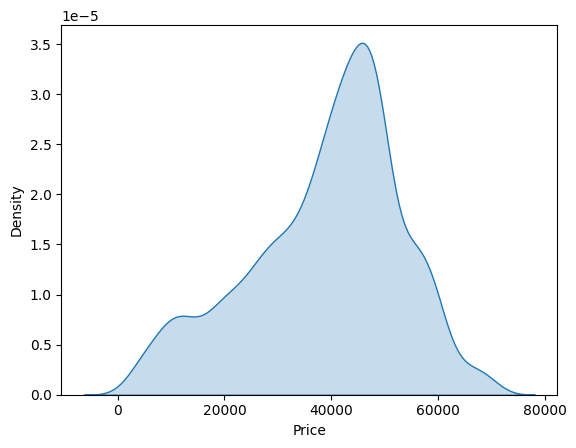

In [ ]:
# KDE for Price

sns.kdeplot(
    data=lf,
    x='Price',
    fill=True
)

<Axes: xlabel='Car_weight_kg', ylabel='Density'>

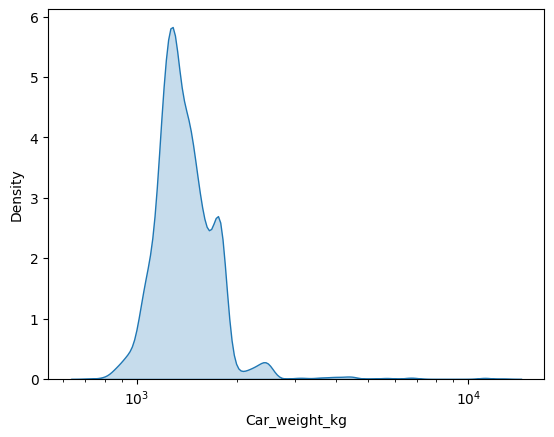

In [ ]:
# KDE for Car_weight_kg

sns.kdeplot(
    data=lf,
    x='Car_weight_kg',
    log_scale=True,
    fill=True
)

<Axes: xlabel='Engine_cap_cc', ylabel='Density'>

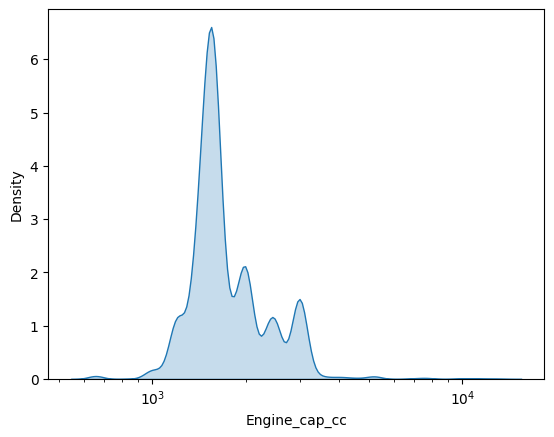

In [ ]:
# KDE for Engine_cap_cc

sns.kdeplot(
    data=lf,
    x='Engine_cap_cc',
    fill=True,
    log_scale=True
)

<Axes: xlabel='Brake_hp', ylabel='Density'>

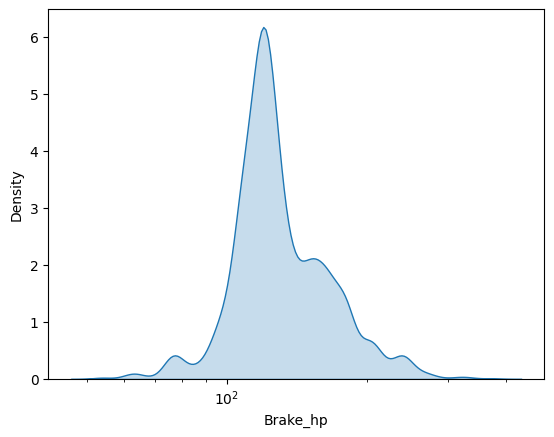

In [ ]:
# KDE for Brake_hp

sns.kdeplot(
    data=lf,
    x='Brake_hp',
    fill=True,
    log_scale=True
)

<Axes: xlabel='car_age', ylabel='Density'>

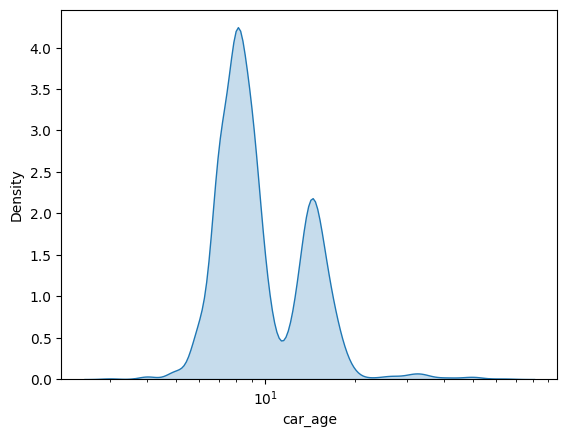

In [ ]:
# KDE for Car_age

sns.kdeplot(
    data=lf,
    x='car_age',
    fill=True,
    log_scale=True
)

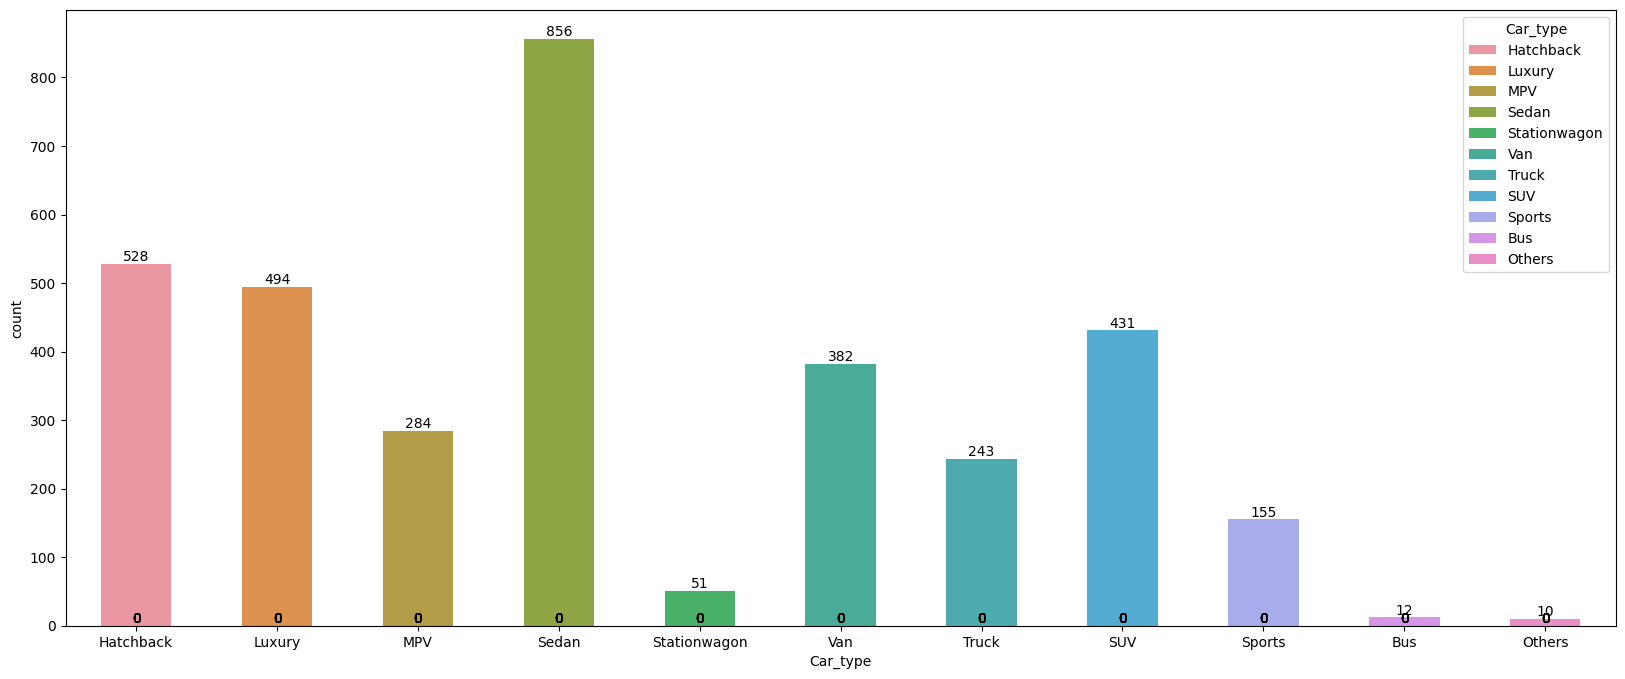

In [ ]:
# Bar plots for categorical columns to understand their distribution. (Eg, Car type, Car_transmission, etc.)
fig, ax = plt.subplots(figsize=(20, 8))

ax = sns.countplot(
    data=lf,
    x='Car_type',
    hue='Car_type',
    width=0.5,
    dodge=False
)

# show the count values
for label in ax.containers:
    ax.bar_label(label)

plt.show()

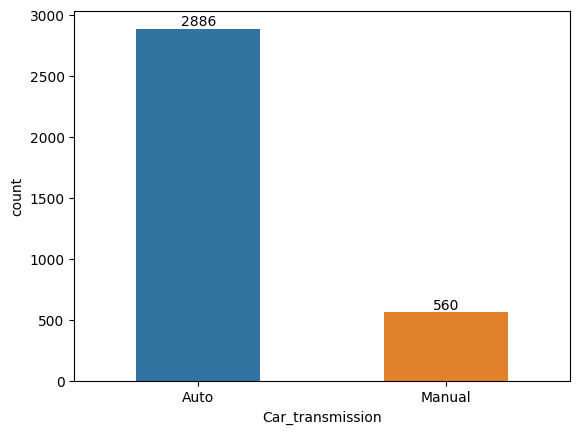

In [ ]:
# Used df to plot the auto and manual counts
ax = sns.countplot(
    data=df,
    x='Car_transmission',
    width=0.5,
    dodge=False
)

# show count values
for label in ax.containers:
    ax.bar_label(label)

plt.show()


In [ ]:
#Jerry and Chong Sun below

In [ ]:
lf = lf.drop(columns = ["Manufacture_date", "Reg_year"])
lf.head()

,COE_term_days,Car_weight_kg,Engine_cap_cc,Car_type,Brake_hp,Price,car_age,Engine_cc_range
0,58,1293.0,1390.0,Hatchback,167,3600,15,1000-1500
1,208,1510.0,2354.0,Luxury,202,9800,15,2000-2500
2,91,1370.0,1799.0,MPV,138,4388,15,1500-2000
3,176,1264.0,1591.0,Sedan,120,6700,14,1500-2000
4,99,1385.0,1799.0,MPV,138,4388,15,1500-2000


In [ ]:
lf = lf.drop(columns=['COE_term_days'])

In [ ]:
lf = lf.drop(columns=['Price'])

In [ ]:
lf.head()

,Car_weight_kg,Engine_cap_cc,Car_type,Brake_hp,car_age,Engine_cc_range
0,1293.0,1390.0,Hatchback,167,15,1000-1500
1,1510.0,2354.0,Luxury,202,15,2000-2500
2,1370.0,1799.0,MPV,138,15,1500-2000
3,1264.0,1591.0,Sedan,120,14,1500-2000
4,1385.0,1799.0,MPV,138,15,1500-2000


In [ ]:
lf2=df[df.columns].copy(deep=True)
lf2.drop(columns=['COE_term_days', 'Car_weight_kg', 'Engine_cap_cc', 'Car_type', 'Brake_hp', 'Price'])
#lf2.head()

,Car_name,Car_transmission,Reg_date,Manufacture_date,COE_term_len,No_owners,Car_url,Description,Reg_year
0,Volkswagen Golf GT Sport 1.4A TSI (COE till 10...,Auto,24-Mar-2009,2008,1mth 28days,3.0,https://www.sgcarmart.com/used_cars/info.php?I...,"Nice attractive short term drive fun, buy back...",2009
1,Honda Accord Euro S 2.4A (COE till 03/2024),Auto,23-Apr-2009,2008,6mths 28days,3.0,https://www.sgcarmart.com/used_cars/info.php?I...,Well maintained and conditioned 2.4 Euro-S Acc...,2009
2,Honda Stream 1.8A X (COE till 12/2023),Auto,05-Dec-2008,2008,3mths 1day,NaN,https://www.sgcarmart.com/used_cars/info.php?I...,Road tax paid till the end.,2008
3,Hyundai Avante 1.6A (COE till 02/2024),Auto,12-Mar-2009,2009,5mths 26days,3.0,https://www.sgcarmart.com/used_cars/info.php?I...,In times of market uncertainties and high rent...,2009
4,Honda Stream 1.8A RSZ Sunroof (COE till 12/2023),Auto,13-Dec-2008,2008,3mths 9days,5.0,https://www.sgcarmart.com/used_cars/info.php?I...,"Agent RSZ model, come with paddle shifter and ...",2008
...,...,...,...,...,...,...,...,...,...
3443,Toyota Corolla Altis 1.6A (COE till 05/2029),Auto,26-Aug-2009,2009,5yrs 8mths 28days,3.0,https://www.sgcarmart.com/used_cars/info.php?I...,Flexible in-house loan by GV cars financing at...,2009
3444,Mercedes-Benz C-Class C180K (COE till 02/2029),Auto,27-Apr-2009,2008,5yrs 5mths 25days,3.0,https://www.sgcarmart.com/used_cars/info.php?I...,Flexible in house loan by GV cars financing at...,2009
3445,Chevrolet Orlando 1.4A Turbo,Auto,18-May-2017,2017,3yrs 8mths 14days,2.0,https://www.sgcarmart.com/used_cars/info.php?I...,Genuine mileage! Unit not to be missed! Wear a...,2017
3446,Toyota Camry 2.4A (COE till 05/2029),Auto,19-Aug-2009,2009,5yrs 8mths 28days,4.0,https://www.sgcarmart.com/used_cars/info.php?I...,Flexible in-house loan by GV cars financing at...,2009


In the code below, we covert the Manufacture Date, Registration Date and COE_term_days columns to be in datetime datatype.

In [ ]:
# Convert Manufacture Date to middle of the year, using standard datetime datatype
lf2["Manufacture_date"] = lf2["Manufacture_date"].astype(str) + "-06-30"
lf2["Manufacture_date"] = pd.to_datetime(lf2["Manufacture_date"], format = "%Y-%m-%d", dayfirst = True, errors = "coerce")

In [ ]:
# Convert Registration Date to standard datetime datatype
lf2["Reg_date"] = pd.to_datetime(lf2["Reg_date"], format = "%d-%b-%Y", dayfirst = True, errors = "coerce")

In [ ]:
#Convert COE_term_days to datetime object
lf2['COE_term_days'] = pd.to_timedelta(lf2['COE_term_days'], unit='D')

In the code below, we extracted the brand names from the full name of the cars.

In [ ]:
# Get the Brand Name of Car
lf2["Car_name"] = lf2["Car_name"].str.split(' ').str[0]

In [ ]:
# Dropping and renaming columns
lf2 = lf2.drop(columns = ["Car_url", "Description", "COE_term_len",'Car_weight_kg', 'Engine_cap_cc', 'Car_type','Brake_hp', 'Reg_year'])
lf2 = lf2.rename(columns = {"Car_name": "Brand_name"})
lf2 = lf2.drop(columns = [])

In [ ]:
lf2.head(20)

,Brand_name,Price,Car_transmission,Reg_date,Manufacture_date,No_owners,COE_term_days
0,Volkswagen,3600,Auto,2009-03-24,2008-06-30,3.0,58 days
1,Honda,9800,Auto,2009-04-23,2008-06-30,3.0,208 days
2,Honda,4388,Auto,2008-12-05,2008-06-30,NaN,91 days
3,Hyundai,6700,Auto,2009-03-12,2009-06-30,3.0,176 days
4,Honda,4388,Auto,2008-12-13,2008-06-30,5.0,99 days
5,Toyota,2700,Auto,2008-11-20,2008-06-30,3.0,76 days
6,Mercedes-Benz,6000,Auto,1990-01-03,1989-06-30,NaN,208 days
7,Hyundai,9999,Auto,2009-09-11,2009-06-30,4.0,297 days
8,Toyota,4000,Auto,2008-12-31,2008-06-30,NaN,117 days
9,Honda,2700,Auto,2008-11-25,2007-06-30,5.0,81 days


In [ ]:
#Combining both groups of data cleaning into lf3
lf3 = pd.concat([lf2, lf], axis=1, join='outer')
lf3.head()

,Brand_name,Price,Car_transmission,Reg_date,Manufacture_date,No_owners,COE_term_days,Car_weight_kg,Engine_cap_cc,Car_type,Brake_hp,car_age,Engine_cc_range
0,Volkswagen,3600,Auto,2009-03-24,2008-06-30,3.0,58 days,1293.0,1390.0,Hatchback,167,15,1000-1500
1,Honda,9800,Auto,2009-04-23,2008-06-30,3.0,208 days,1510.0,2354.0,Luxury,202,15,2000-2500
2,Honda,4388,Auto,2008-12-05,2008-06-30,NaN,91 days,1370.0,1799.0,MPV,138,15,1500-2000
3,Hyundai,6700,Auto,2009-03-12,2009-06-30,3.0,176 days,1264.0,1591.0,Sedan,120,14,1500-2000
4,Honda,4388,Auto,2008-12-13,2008-06-30,5.0,99 days,1385.0,1799.0,MPV,138,15,1500-2000


In [ ]:
lf3.info()
#Still have 3 registration dates null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3446 entries, 0 to 3447
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Brand_name        3446 non-null   object         
 1   Price             3446 non-null   int64          
 2   Car_transmission  3446 non-null   object         
 3   Reg_date          3443 non-null   datetime64[ns] 
 4   Manufacture_date  3446 non-null   datetime64[ns] 
 5   No_owners         3340 non-null   float64        
 6   COE_term_days     3446 non-null   timedelta64[ns]
 7   Car_weight_kg     3446 non-null   float64        
 8   Engine_cap_cc     3446 non-null   float64        
 9   Car_type          3446 non-null   object         
 10  Brake_hp          3446 non-null   int64          
 11  car_age           3446 non-null   int64          
 12  Engine_cc_range   3446 non-null   object         
dtypes: datetime64[ns](2), float64(3), int64(3), object(4), timedelt

In [ ]:
lf3[pd.isnull(lf3['Reg_date'])]
#Set reg_date to exactly one year after manufacture date, and reg_year the same as the reg_date

,Brand_name,Price,Car_transmission,Reg_date,Manufacture_date,No_owners,COE_term_days,Car_weight_kg,Engine_cap_cc,Car_type,Brake_hp,car_age,Engine_cc_range
2312,Volkswagen,48800,Auto,NaT,2016-06-30,3.0,0 days,1267.0,1580.0,Hatchback,113,7,1500-2000
3008,Mitsubishi,59800,Manual,NaT,2017-06-30,2.0,0 days,1555.0,2199.0,SUV,120,6,2000-2500
3257,Datsun,58800,Manual,NaT,2016-06-30,2.0,0 days,1150.0,988.0,Others,97,7,500-1000


In [ ]:
#Renaming all columns so its more comprehensible
new_columns = ['Car_name', 'Car_price', 'Transmission_type', 'Registration_date', 'Manufacture_date', 'Number_owners', 'COE_days_left', 'Car_weight(kg)', 'Engine_cap(cc)', 'Car_type', 'Brake_hp', 'Car_age', 'Engine_cap_range(cc)']
lf3.columns= new_columns

In [ ]:
lf3.head()

,Car_name,Car_price,Transmission_type,Registration_date,Manufacture_date,Number_owners,COE_days_left,Car_weight(kg),Engine_cap(cc),Car_type,Brake_hp,Car_age,Engine_cap_range(cc)
0,Volkswagen,3600,Auto,2009-03-24,2008-06-30,3.0,58 days,1293.0,1390.0,Hatchback,167,15,1000-1500
1,Honda,9800,Auto,2009-04-23,2008-06-30,3.0,208 days,1510.0,2354.0,Luxury,202,15,2000-2500
2,Honda,4388,Auto,2008-12-05,2008-06-30,NaN,91 days,1370.0,1799.0,MPV,138,15,1500-2000
3,Hyundai,6700,Auto,2009-03-12,2009-06-30,3.0,176 days,1264.0,1591.0,Sedan,120,14,1500-2000
4,Honda,4388,Auto,2008-12-13,2008-06-30,5.0,99 days,1385.0,1799.0,MPV,138,15,1500-2000


In [ ]:
lf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3446 entries, 0 to 3447
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Car_name              3446 non-null   object         
 1   Car_price             3446 non-null   int64          
 2   Transmission_type     3446 non-null   object         
 3   Registration_date     3443 non-null   datetime64[ns] 
 4   Manufacture_date      3446 non-null   datetime64[ns] 
 5   Number_owners         3340 non-null   float64        
 6   COE_days_left         3446 non-null   timedelta64[ns]
 7   Car_weight(kg)        3446 non-null   float64        
 8   Engine_cap(cc)        3446 non-null   float64        
 9   Car_type              3446 non-null   object         
 10  Brake_hp              3446 non-null   int64          
 11  Car_age               3446 non-null   int64          
 12  Engine_cap_range(cc)  3446 non-null   object         
dtypes: 

## How car age affects prices of different car types


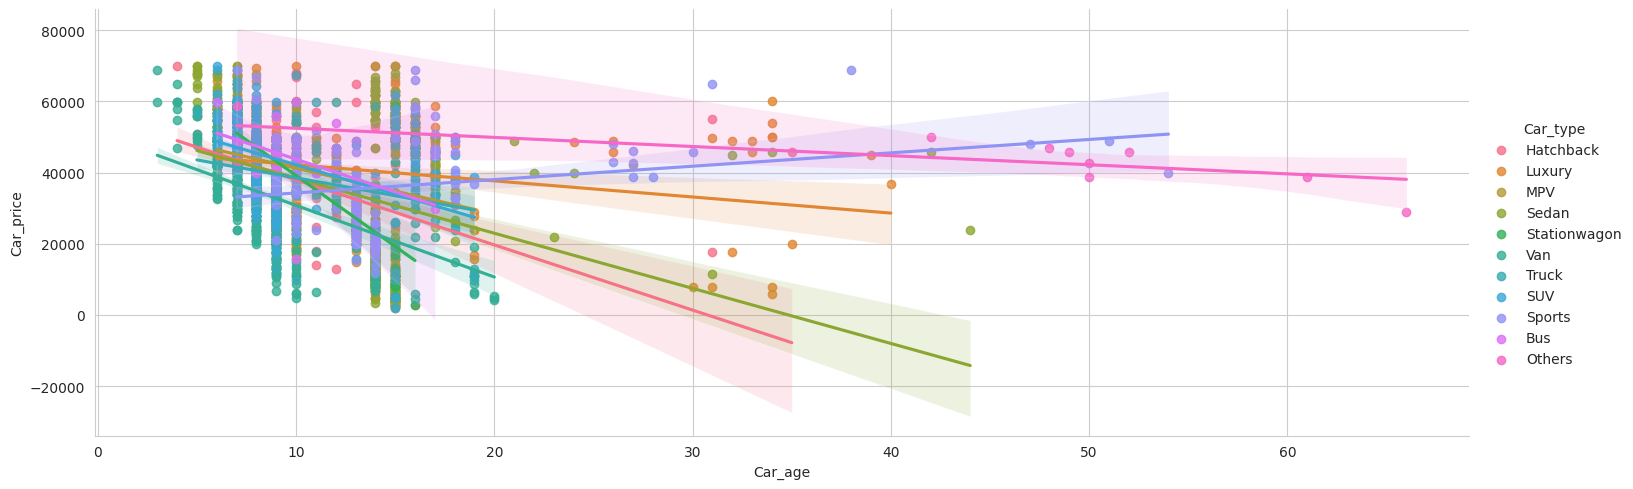

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(data=lf3, x='Car_age', y='Car_price', hue='Car_type', aspect=3 )

## Analyse prices of cars based on transmission type

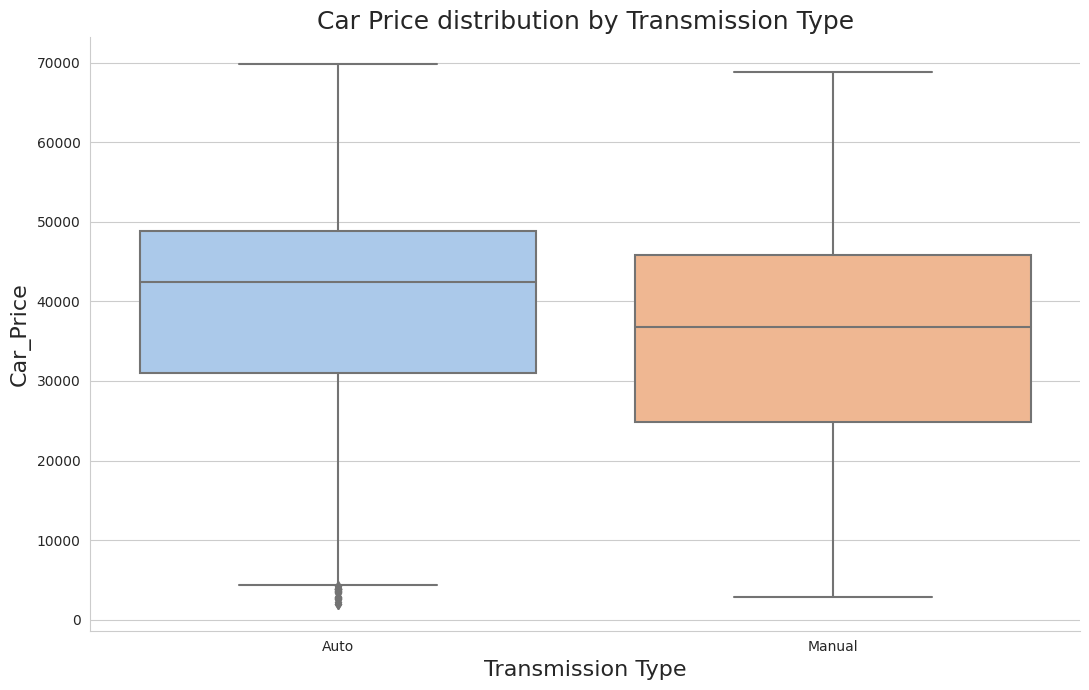

In [ ]:
sns.set_style('whitegrid')
palette = sns.color_palette('pastel')
plt.figure(figsize=(11, 7))



plot = sns.boxplot(data=lf3, x='Transmission_type', y='Car_price', palette=palette)

plot.set_title('Car Price distribution by Transmission Type', fontsize=18)
plot.set_xlabel('Transmission Type', fontsize=16)
plot.set_ylabel('Car_Price', fontsize=16)



medians = lf3.groupby(['Transmission_type'])['Car_price'].median()
vertical_offset = lf3['Car_price'].median() * 0.05  # offset from median for display
for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick] + vertical_offset, f'{medians[xtick]:.2f}',
            horizontalalignment='center', size='small', color='black', weight='semibold')


sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

## Analyse how Car type affects Car price

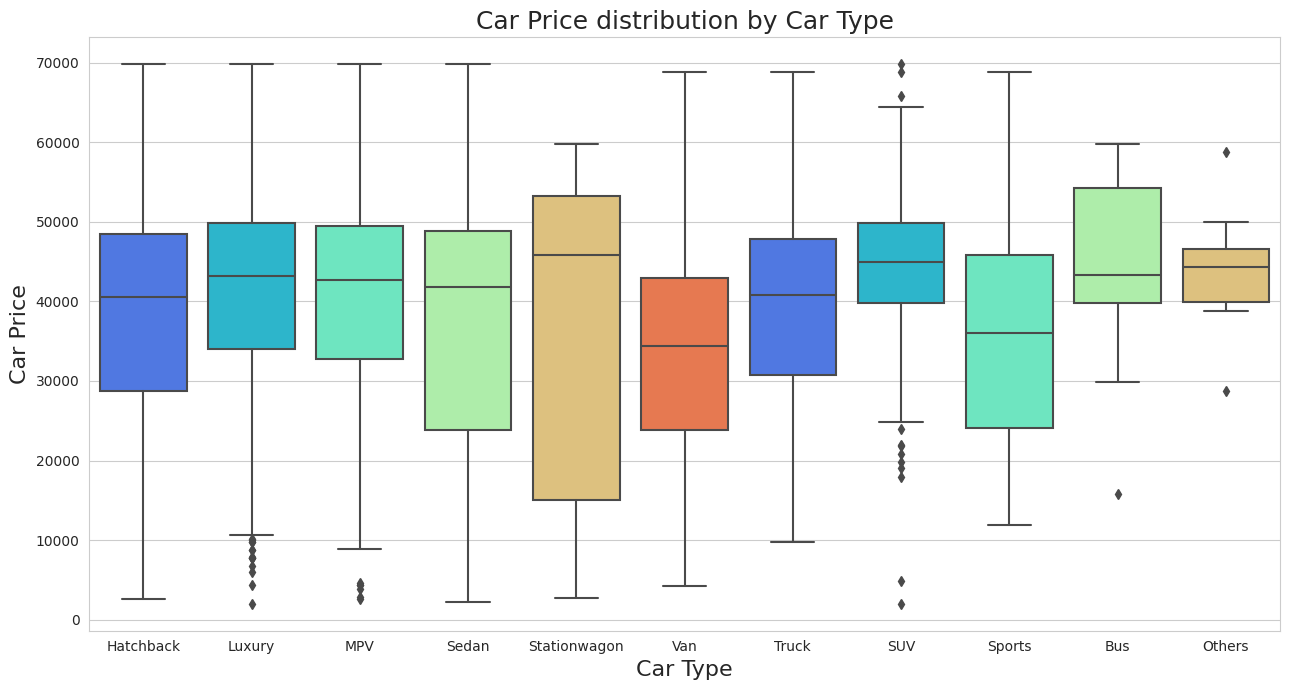

In [ ]:
sns.set_style('whitegrid')
palette = sns.color_palette('rainbow')
plt.figure(figsize=(13,7))

plot = sns.boxplot(x=lf3['Car_type'], y=lf3['Car_price'], palette = palette)

plot.set_title('Car Price distribution by Car Type', fontsize=18)
plot.set_xlabel('Car Type', fontsize=16)
plot.set_ylabel('Car Price', fontsize=16)

medians = lf3.groupby(['Transmission_type'])['Car_price'].median()
vertical_offset = lf3['Car_price'].median() * 0.05  # offset from median for display
for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick] + vertical_offset, f'{medians[xtick]:.2f}',
            horizontalalignment='center', size='small', color='black', weight='semibold')

plt.tight_layout()
plt.show()

## Analyse how different variables correlate to each other

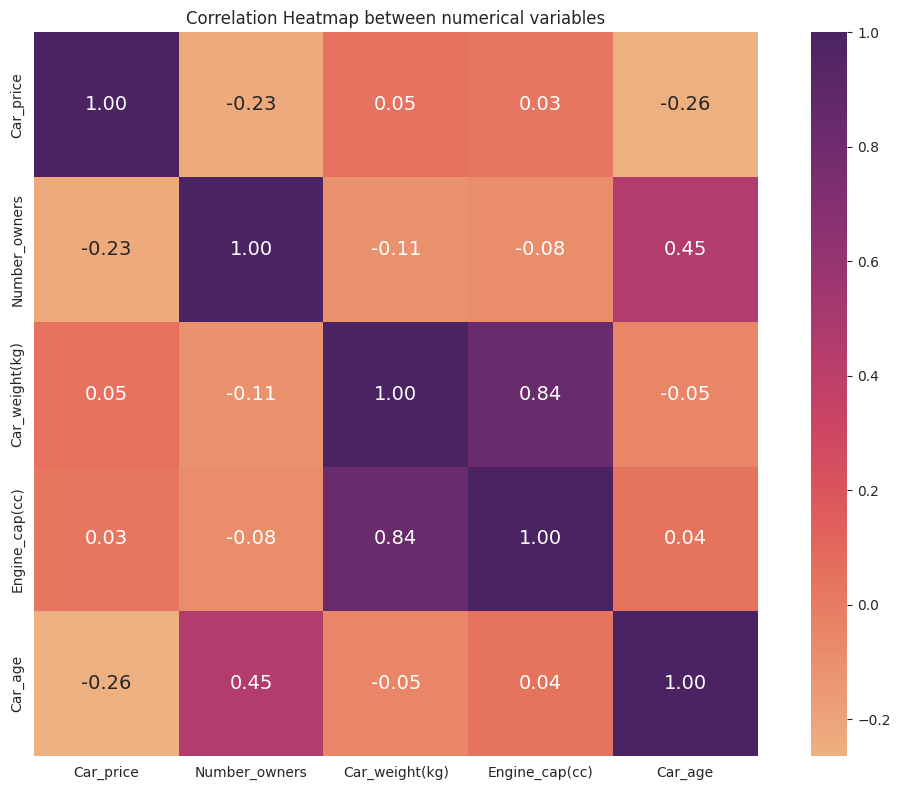

In [ ]:
#Numerical Columns
numerical_cols = ['Car_price', 'Number_owners', 'Car_weight(kg)', 'Engine_cap(cc)', 'Car_age']
lf3_numerical = lf3[numerical_cols]

correlation_matrix = lf3_numerical.corr()

plt.figure(figsize=(11,8))
plot = sns.heatmap(correlation_matrix, annot=True, square =True, cmap='flare', fmt='.2f', annot_kws={'size':14})

plot.set_title('Correlation Heatmap between numerical variables')
plt.tight_layout()
plt.show()

In [ ]:
lf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3446 entries, 0 to 3447
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Car_name              3446 non-null   object         
 1   Car_price             3446 non-null   int64          
 2   Transmission_type     3446 non-null   object         
 3   Registration_date     3443 non-null   datetime64[ns] 
 4   Manufacture_date      3446 non-null   datetime64[ns] 
 5   Number_owners         3340 non-null   float64        
 6   COE_days_left         3446 non-null   timedelta64[ns]
 7   Car_weight(kg)        3446 non-null   float64        
 8   Engine_cap(cc)        3446 non-null   float64        
 9   Car_type              3446 non-null   object         
 10  Brake_hp              3446 non-null   int64          
 11  Car_age               3446 non-null   int64          
 12  Engine_cap_range(cc)  3446 non-null   object         
dtypes: 

In [ ]:
# Generate true expiry date of COE and Number of Days before COE expires
lf3["COE_expiry_date"] = pd.to_datetime("2023-09-03") + pd.to_timedelta(lf2["COE_term_days"], unit='d')
lf3["COE_term_days(As of current time)"] = lf3["COE_expiry_date"] - pd.Timestamp("now")

In [ ]:
lf3["Registration_date"] = lf3["Registration_date"].fillna(lf3["Manufacture_date"])
lf3.head()

,Car_name,Car_price,Transmission_type,Registration_date,Manufacture_date,Number_owners,COE_days_left,Car_weight(kg),Engine_cap(cc),Car_type,Brake_hp,Car_age,Engine_cap_range(cc),COE_expiry_date,COE_term_days(As of current time)
0,Volkswagen,3600,Auto,2009-03-24,2008-06-30,3.0,58 days,1293.0,1390.0,Hatchback,167,15,1000-1500,2023-10-31,22 days 22:51:23.498121
1,Honda,9800,Auto,2009-04-23,2008-06-30,3.0,208 days,1510.0,2354.0,Luxury,202,15,2000-2500,2024-03-29,172 days 22:51:23.498121
2,Honda,4388,Auto,2008-12-05,2008-06-30,NaN,91 days,1370.0,1799.0,MPV,138,15,1500-2000,2023-12-03,55 days 22:51:23.498121
3,Hyundai,6700,Auto,2009-03-12,2009-06-30,3.0,176 days,1264.0,1591.0,Sedan,120,14,1500-2000,2024-02-26,140 days 22:51:23.498121
4,Honda,4388,Auto,2008-12-13,2008-06-30,5.0,99 days,1385.0,1799.0,MPV,138,15,1500-2000,2023-12-11,63 days 22:51:23.498121


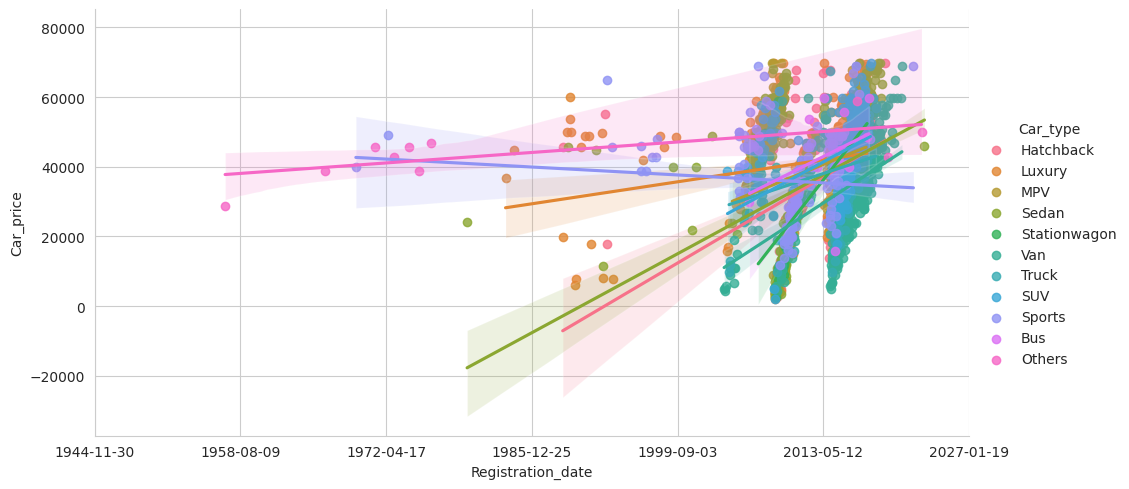

In [ ]:
# Plot Linear Regression for correlation between Car Price and Registration Date
cell_df = lf3[['Registration_date','Car_price', 'Car_type', 'COE_days_left']].copy()
cell_df['Registration_date'] = pd.to_datetime(lf3['Registration_date']).apply(lambda date: date.toordinal())

tempplot = sns.lmplot(data=cell_df, x='Registration_date', y='Car_price', aspect=2, hue='Car_type')
#copypasta from https://stackoverflow.com/questions/69687848/format-x-axis-dates-in-sns-lmplot, convert x-axis to dates
# Potential Confounding Variable is COE
for ax in tempplot.axes.flat:
    labels = ax.get_xticks() # get x labels
    new_labels = [date.fromordinal(int(label)) for label in labels] # convert ordinal back to datetime
    ax.set_xticks(labels)
    ax.set_xticklabels(new_labels, rotation=0) # set new labels
del cell_df

In [ ]:
# Unique check
print(lf3["Transmission_type"].unique())
print(lf3["Number_owners"].unique())
print(lf3["Car_type"].unique())
print(lf3["Car_name"].unique())

['Auto' 'Manual']
[ 3. nan  5.  4.  6.  1.  2.]
['Hatchback' 'Luxury' 'MPV' 'Sedan' 'Stationwagon' 'Van' 'Truck' 'SUV'
 'Sports' 'Bus' 'Others']
['Volkswagen' 'Honda' 'Hyundai' 'Toyota' 'Mercedes-Benz' 'Mitsubishi'
 'Chevrolet' 'Suzuki' 'Nissan' 'Fiat' 'Kia' 'Audi' 'Citroen' 'Opel' 'BMW'
 'Mazda' 'Daihatsu' 'Renault' 'Perodua' 'Proton' 'Isuzu' 'Peugeot' 'Volvo'
 'Lexus' 'Jaguar' 'Subaru' 'MINI' 'Hino' 'Datsun' 'Ford' 'Morris' 'Alfa'
 'UD' 'Infiniti' 'Maxus' 'MAN' 'Land' 'Porsche' 'JAC' 'MG' 'Austin'
 'Foton' 'SEAT' 'Ssangyong' 'Triumph' 'Rover' 'Mitsuoka' 'BYD']


In [ ]:
# Number_owners: Replace Nan values in Number_owners to 7
num_owners = lf3["Number_owners"]
num_owners = num_owners.apply(lambda x: 7 if np.isnan(x) else x)

# COE Days left: Removing "days" string and convert to integer
import re

curr_COE_days_left = lf3["COE_days_left"].astype(str)
curr_COE_days_left = curr_COE_days_left.apply(lambda x: int(re.sub(r"\sdays", "", x)))

# Encoding of categorical data

# Transmission_type: Auto = 0, Manual = 1
trans_type = lf3["Transmission_type"]
trans_type = trans_type.apply(lambda x: 0 if x=="Auto" else 1)

d = {'num_owners': num_owners, 'trans_type': trans_type, 'curr_COE_days_left': curr_COE_days_left}
encoded_1 = pd.DataFrame(data=d)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

car_type_categories = ['Hatchback', 'Luxury', 'MPV', 'Sedan', 'Stationwagon', 'Van', 'Truck', 'SUV',
                       'Sports', 'Bus', 'Others']
brand_categories = ['Volkswagen', 'Honda', 'Hyundai', 'Toyota', 'Mercedes-Benz', 'Mitsubishi',
                    'Chevrolet', 'Suzuki', 'Nissan', 'Fiat', 'Kia', 'Audi', 'Citroen', 'Opel', 'BMW',
                    'Mazda', 'Daihatsu', 'Renault', 'Perodua', 'Proton', 'Isuzu', 'Peugeot', 'Volvo',
                    'Lexus', 'Jaguar', 'Subaru', 'MINI', 'Hino', 'Datsun', 'Ford', 'Morris', 'Alfa',
                    'UD', 'Infiniti', 'Maxus', 'MAN', 'Land', 'Porsche', 'JAC', 'MG', 'Austin',
                    'Foton', 'SEAT', 'Ssangyong', 'Triumph', 'Rover', 'Mitsuoka', 'BYD']

encoder = OrdinalEncoder(categories=[car_type_categories, brand_categories])
encoded_2 = encoder.fit_transform(lf3[['Car_type','Car_name']])

add_encoded_cols = pd.concat([lf3, encoded_1, pd.DataFrame(encoded_2)], axis=1)
processed_features = add_encoded_cols.rename(columns={0: 'car_type', 1: 'car_brand'})
processed_features

,Car_name,Car_price,Transmission_type,Registration_date,Manufacture_date,Number_owners,COE_days_left,Car_weight(kg),Engine_cap(cc),Car_type,Brake_hp,Car_age,Engine_cap_range(cc),COE_expiry_date,COE_term_days(As of current time),num_owners,trans_type,curr_COE_days_left,car_type,car_brand
0,Volkswagen,3600,Auto,2009-03-24,2008-06-30,3.0,58 days,1293.0,1390.0,Hatchback,167,15,1000-1500,2023-10-31,22 days 22:51:23.498121,3.0,0,58,0.0,0.0
1,Honda,9800,Auto,2009-04-23,2008-06-30,3.0,208 days,1510.0,2354.0,Luxury,202,15,2000-2500,2024-03-29,172 days 22:51:23.498121,3.0,0,208,1.0,1.0
2,Honda,4388,Auto,2008-12-05,2008-06-30,NaN,91 days,1370.0,1799.0,MPV,138,15,1500-2000,2023-12-03,55 days 22:51:23.498121,7.0,0,91,2.0,1.0
3,Hyundai,6700,Auto,2009-03-12,2009-06-30,3.0,176 days,1264.0,1591.0,Sedan,120,14,1500-2000,2024-02-26,140 days 22:51:23.498121,3.0,0,176,3.0,2.0
4,Honda,4388,Auto,2008-12-13,2008-06-30,5.0,99 days,1385.0,1799.0,MPV,138,15,1500-2000,2023-12-11,63 days 22:51:23.498121,5.0,0,99,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,Toyota,63800,Auto,2009-08-26,2009-06-30,3.0,2093 days,1195.0,1598.0,Sedan,107,14,1500-2000,2029-05-27,2057 days 22:51:23.498121,3.0,0,2093,3.0,3.0
3442,Mercedes-Benz,64800,Auto,2009-04-27,2008-06-30,3.0,2000 days,1485.0,1796.0,Luxury,154,15,1500-2000,2029-02-23,1964 days 22:51:23.498121,3.0,0,2000,1.0,4.0
3443,Chevrolet,63200,Auto,2017-05-18,2017-06-30,2.0,1349 days,1650.0,1362.0,MPV,138,6,1000-1500,2027-05-14,1313 days 22:51:23.498121,2.0,0,1349,2.0,6.0
3444,Toyota,61800,Auto,2009-08-19,2009-06-30,4.0,2093 days,1540.0,2362.0,Luxury,164,14,2000-2500,2029-05-27,2057 days 22:51:23.498121,4.0,0,2093,1.0,3.0


In [ ]:
final_features = processed_features.drop(["Transmission_type", "Registration_date", "Manufacture_date", "Number_owners", "Car_type", "Engine_cap_range(cc)", "COE_expiry_date", "COE_term_days(As of current time)", "COE_days_left", "Car_name"], axis=1)
final_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_price           3446 non-null   int64  
 1   Car_weight(kg)      3446 non-null   float64
 2   Engine_cap(cc)      3446 non-null   float64
 3   Brake_hp            3446 non-null   int64  
 4   Car_age             3446 non-null   int64  
 5   num_owners          3446 non-null   float64
 6   trans_type          3446 non-null   int64  
 7   curr_COE_days_left  3446 non-null   int64  
 8   car_type            3446 non-null   float64
 9   car_brand           3446 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 269.3 KB


In [ ]:
# Standardisation of input features
y = final_features.Car_price
x = final_features.drop(columns=['Car_price'])

x_std = (x - x.mean()) / x.std()

In [ ]:
# Saving processed dataset into pickle file
data_std = pd.concat([x_std, y], axis=1)
data_std.to_pickle("final_features.pkl")